In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
sns.set_style(style='white') 
sns.set(rc={
    'figure.figsize':(16,10), 
    'axes.facecolor': 'white'})

In [72]:
test_data = pd.read_csv('test.csv')

In [73]:
train_data = pd.read_csv('train.csv')

In [74]:
train_data.shape

(891, 12)

In [75]:
test_data.shape

(418, 11)

In [76]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [77]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [79]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [80]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [81]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [82]:
columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch']

array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Parch', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age'>],
       [<AxesSubplot:xlabel='Survived', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Pclass', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Age', ylabel='SibSp'>,
       

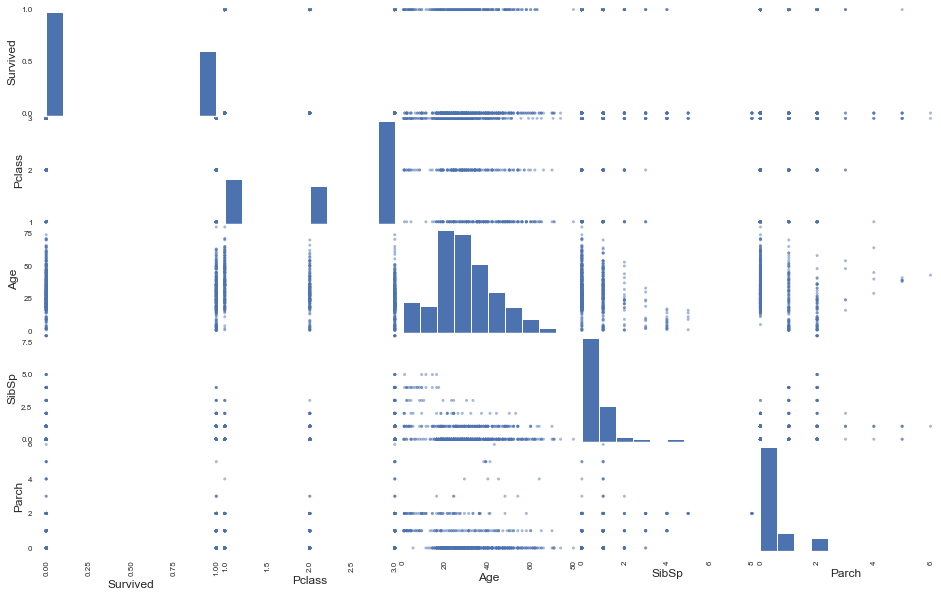

In [83]:
pd.plotting.scatter_matrix(train_data[columns])

In [84]:
Sur = train_data.groupby(['Survived'], as_index=False).agg({'PassengerId':'count'})

<AxesSubplot:xlabel='Survived', ylabel='PassengerId'>

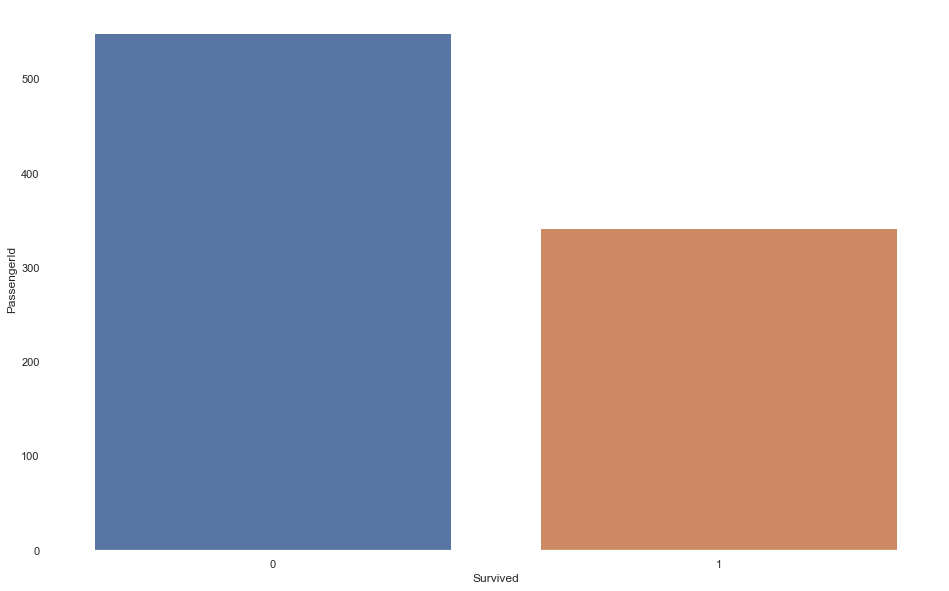

In [85]:
sns.barplot(x = 'Survived', y = 'PassengerId',data = Sur)

In [86]:
Sur_sex = train_data.groupby(['Survived', 'Sex'], as_index=False).agg({'PassengerId':'count'})

<AxesSubplot:xlabel='Survived', ylabel='PassengerId'>

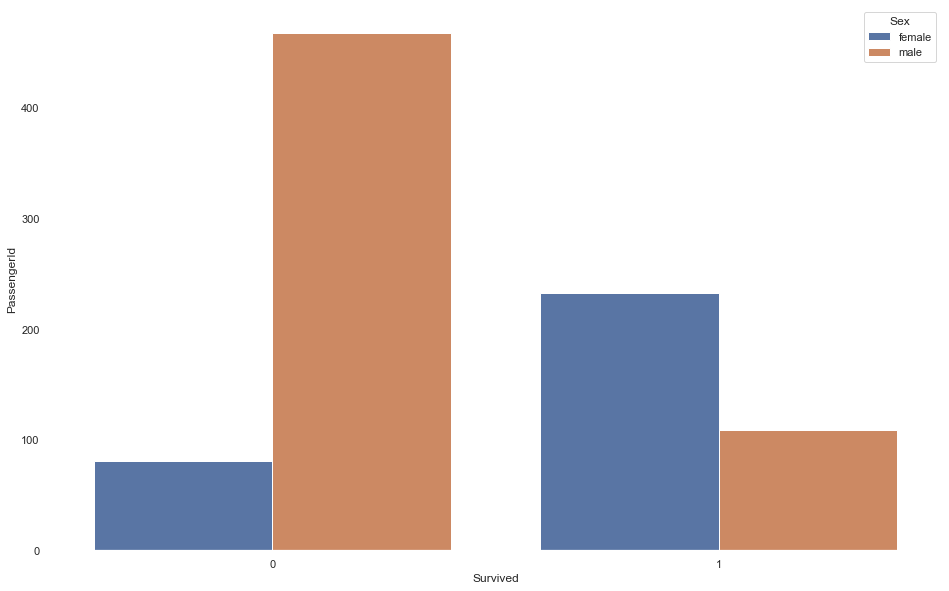

In [87]:
sns.barplot(x = 'Survived', y = 'PassengerId',hue = 'Sex',data = Sur_sex)

In [88]:
Sur_Pc = train_data.groupby(['Survived', 'Pclass'], as_index=False).agg({'PassengerId':'count'})

<AxesSubplot:xlabel='Pclass', ylabel='PassengerId'>

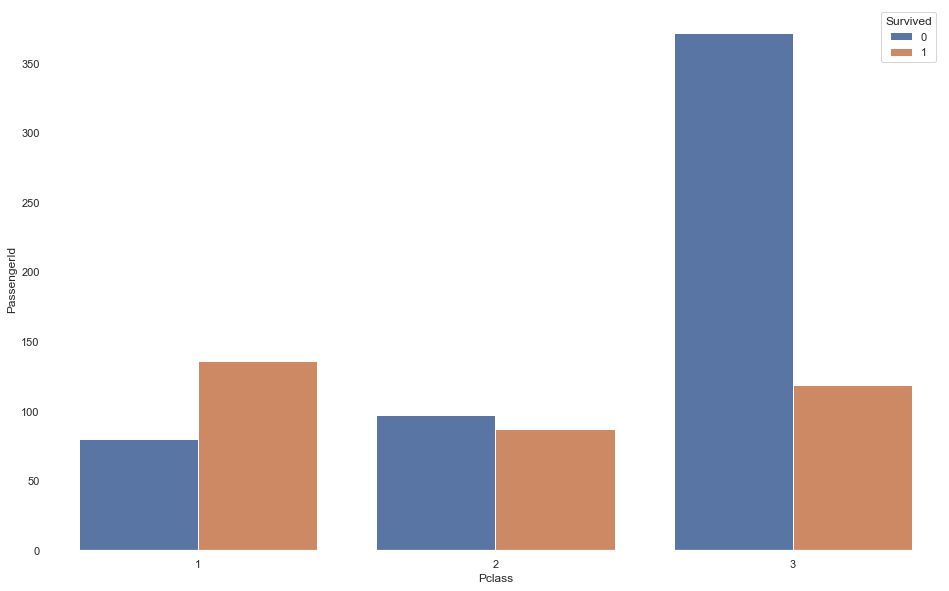

In [89]:
sns.barplot(x="Pclass", y="PassengerId", hue = 'Survived', data=Sur_Pc)

In [90]:
Sur_Sib = train_data.groupby(['Survived', 'SibSp'], as_index=False).agg({'PassengerId':'count'})

In [91]:
Sur_Sib

,Survived,SibSp,PassengerId
0,0,0,398
1,0,1,97
2,0,2,15
3,0,3,12
4,0,4,15
5,0,5,5
6,0,8,7
7,1,0,210
8,1,1,112
9,1,2,13


<AxesSubplot:xlabel='SibSp', ylabel='PassengerId'>

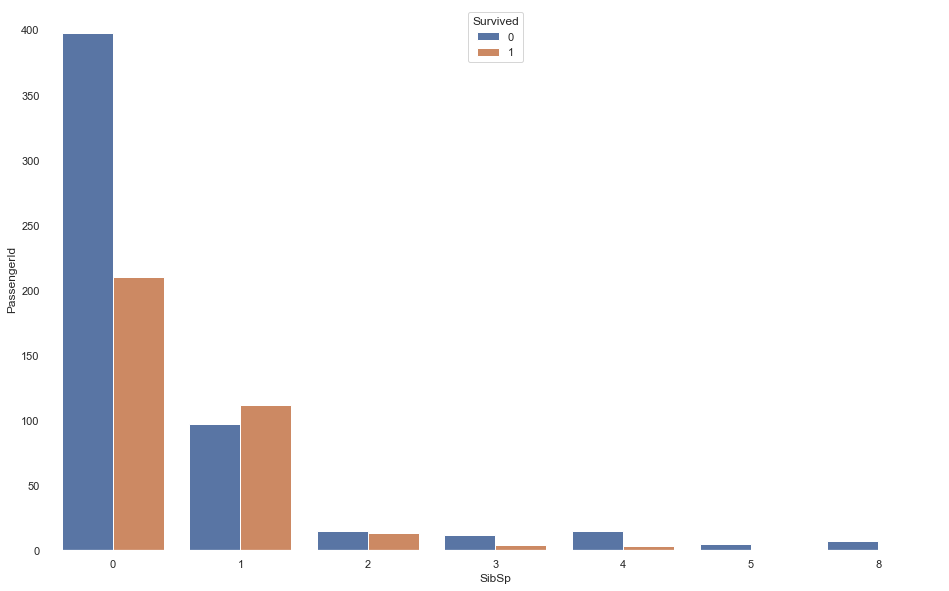

In [92]:
sns.barplot(x="SibSp", y="PassengerId", hue = 'Survived', data=Sur_Sib)

In [93]:
Sur_Par = train_data.groupby(['Survived', 'Parch'], as_index=False).agg({'PassengerId':'count'})

In [94]:
Sur_Par

,Survived,Parch,PassengerId
0,0,0,445
1,0,1,53
2,0,2,40
3,0,3,2
4,0,4,4
5,0,5,4
6,0,6,1
7,1,0,233
8,1,1,65
9,1,2,40


<AxesSubplot:xlabel='Parch', ylabel='PassengerId'>

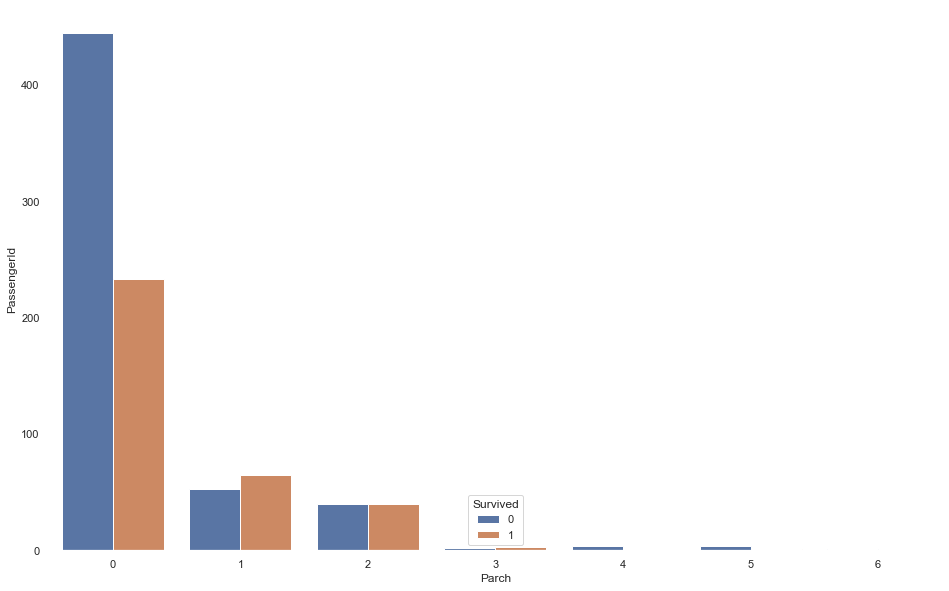

In [95]:
sns.barplot(x="Parch", y="PassengerId", hue = 'Survived', data=Sur_Par)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


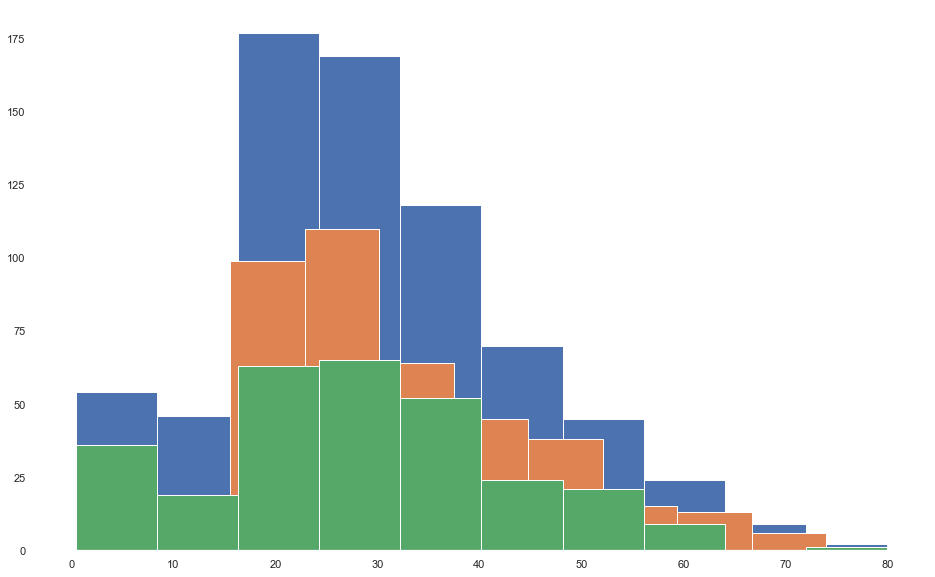

In [96]:
print(train_data['Age'].hist())
print(train_data[train_data['Survived'] == 0]['Age'].hist())
print(train_data[train_data['Survived'] == 1]['Age'].hist())

Так как по первичному анализу выживание в большей степени зависит от пола и класса каюты, попробуем заполнить возраст пассажиров сгруппировав их по этим признакам и взяв средний возраст из каждой группы

In [97]:
#Функция для заполнения пропущенного возраста 
def Nage(df):
    df_m = train_data.groupby(['Sex', 'Pclass'])
    df['Age'] = df_m['Age'].apply(lambda x: x.fillna(round(x.median())))
    return df

In [98]:
Nage(train_data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [99]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Пропущенные значения порта отправления заполним самым часто встречаемым значением

In [100]:
train_data['Embarked'].fillna('S',inplace = True)

In [101]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [102]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Для начала реализуем алгоритм случайного леса и оставим только колонки, которые по первичному анализу будут полезны для обучения алгоритма

In [136]:
col1 = ['Pclass', 'Age','Sex', 'SibSp', 'Parch','Fare', 'Embarked']

In [137]:
#Реализуем алгоритм случайного леса для начала подберём гиперпараметры
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


y = train_data["Survived"] 
X = pd.get_dummies(train_data[col1])
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.20)

#Сразу попробуем подобрать оптимальные параметры для настройки случайного леса
parameters = {'n_estimators': [1000], 'max_depth':[7, 8, 9, 10], 'criterion' :['gini', 'entropy']}
RandomForestModel = RandomForestClassifier()
clf = GridSearchCV(estimator=RandomForestModel, param_grid=parameters, cv= 5, n_jobs=-1)
clf.fit(X_train1, y_train1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 8, 9, 10], 'n_estimators': [1000]})

In [138]:
#Посмотрим на лучшие параметры настройки
clf.best_params_

{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 1000}

In [139]:
#Обучим случайный лес на этих параметрах
RandomForestModel = RandomForestClassifier(n_estimators = 1000, criterion = 'gini', max_depth = 9, n_jobs=-1)

RandomForestModel.fit(X_train1, y_train1)
y_pred1 = RandomForestModel.predict(X_test1)

# Для проверки будем использовать кроссвалидацию
scores = cross_val_score(RandomForestModel, X, y, cv=5)
print(scores)

[0.81005587 0.81460674 0.86516854 0.80337079 0.85393258]


In [140]:
#Также посмотрим на матрицу ошибок и на основные метрики классификации
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))

[[99  8]
 [20 52]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       107
           1       0.87      0.72      0.79        72

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.84      0.84       179



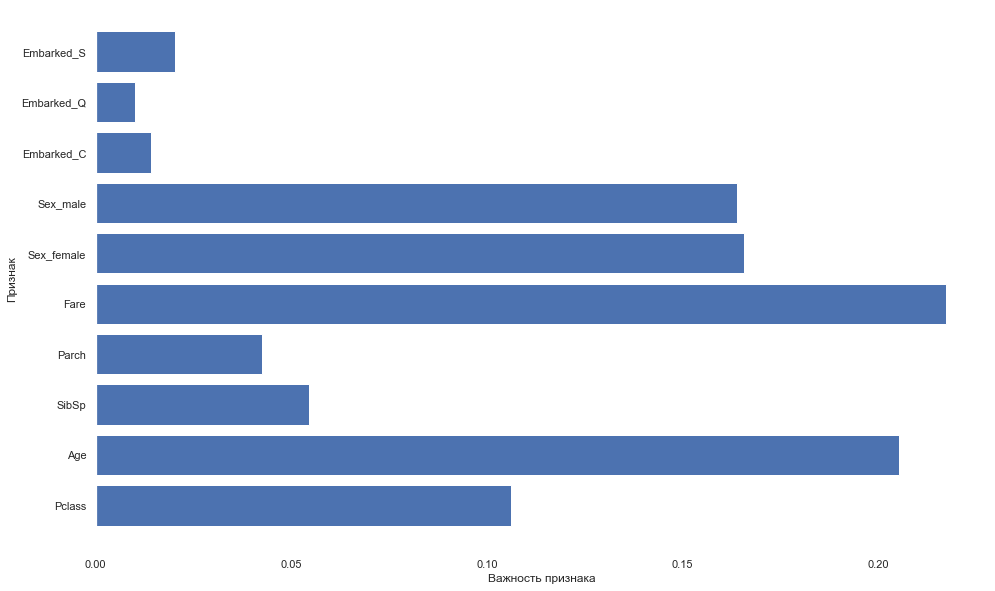

In [141]:
# Построим график для оценки важности признаков для обученной модели(подходит только для древовидных алгоритмов)
def plot_feature_importances_cancer(model):
 n_features = X.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), X)
 plt.xlabel("Важность признака")
 plt.ylabel("Признак")
plot_feature_importances_cancer(RandomForestModel)

Как и при первичном анализе алгоритм оценил такие признаки как возраст, класс, пол и цену билета более важными, чем все остальные

In [142]:
Nage(test_data)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,22.0,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,38.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,26.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,35.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,35.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,44.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,22.0,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,34.0,0,0,359309,8.0500,NaN,S


In [143]:
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

In [144]:
X_test = pd.get_dummies(test_data[col1])
predictions = RandomForestModel.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})
output.to_csv('RandomForest.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Следующий алгоритм классификации будет логистическая регрессия. В отличии от случайного леса она потребует большей предобратки данных

In [145]:
col2 = ['Pclass', 'Age','Sex', 'SibSp', 'Parch','Fare', 'Embarked']

In [146]:
# Для начала посмотрим на данные в том виде, в котором мы будем подавать их в модель
X_prob = pd.get_dummies(train_data[col2])
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


Как и с деревом решений модель не работает с качественными данными, но ещё данные не должны коррелировать друг с другом. Как мы увидем ниже новые столбцы, которые мы получили с помощью get_dummies имеют отрицательную корреляцию(так и должно быть). Исправить это поможет удаление одного из коррелирующих столбцов перед подачей данных на обучение модели

<AxesSubplot:>

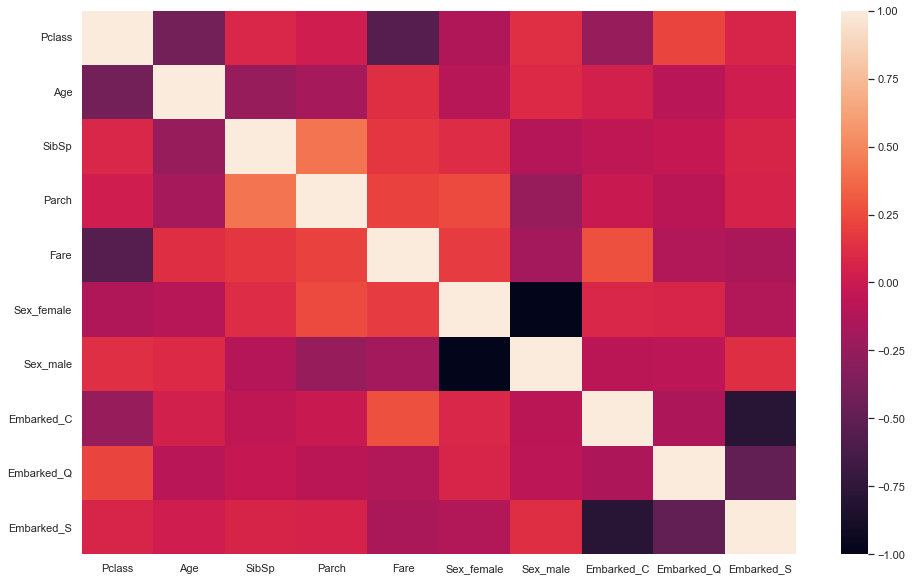

In [147]:
sns.heatmap(X.corr())

In [148]:
# Отключим предупреждения от питона
import warnings
warnings.filterwarnings('ignore')

In [152]:
# Реализуем алгоритм логистической регрессии
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

y = train_data["Survived"]
X = pd.get_dummies(train_data[col2])

#Удаление коррелирующих столбцов
X.drop(['Embarked_C', 'Sex_male'],axis=1, inplace=True)

scaler = MinMaxScaler(feature_range = (0, 1)) #Преобразуем к скалярному виду
scaler.fit(X)
X = scaler.transform(X)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.20)

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train2, y_train2)
y_pred2 = logisticRegr.predict(X_test2)
scores = cross_val_score(logisticRegr, X, y, cv=5)
print(scores)

[0.7877095  0.80898876 0.78651685 0.76404494 0.82022472]


In [165]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

[[92 24]
 [25 38]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       116
           1       0.61      0.60      0.61        63

    accuracy                           0.73       179
   macro avg       0.70      0.70      0.70       179
weighted avg       0.73      0.73      0.73       179



In [166]:
X_test = pd.get_dummies(test_data[col2])
X_test.drop(['Embarked_C', 'Sex_male'],axis=1, inplace=True)
predictions = logisticRegr.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('LogisticRegression.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Следующий алгоритм К-ближайших соседей базовый алгоритм, который хорошо бы себя показал как и логистическая регрессия на большем объёме данных.

In [167]:
col3 = ['Pclass', 'Age','Sex', 'SibSp', 'Parch','Fare', 'Embarked']

In [168]:
#k-nearest
from sklearn.neighbors import KNeighborsClassifier

y = train_data["Survived"]
X = pd.get_dummies(train_data[col3])
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.20)

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train3, y_train3)

y_pred3 = neigh.predict(X_test3)
scores = cross_val_score(neigh, X, y, cv=5)
print(scores)

[0.67597765 0.67977528 0.71910112 0.73595506 0.71910112]


In [169]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test3, y_pred3))
print(classification_report(y_test3, y_pred3))

[[87 16]
 [29 47]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       103
           1       0.75      0.62      0.68        76

    accuracy                           0.75       179
   macro avg       0.75      0.73      0.74       179
weighted avg       0.75      0.75      0.74       179



In [170]:
X_test = pd.get_dummies(test_data[col3])
predictions = neigh.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('k-nearest.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Градиентный бустинг деревьев регрессии – еще один ансамблевый метод,который объединяет в себе множество деревьев для создания более мощной модели.

In [171]:
col4 = ['Pclass', 'Age','Sex', 'SibSp', 'Parch','Fare', 'Embarked']

In [172]:
#Градиентный бустинг
from sklearn.ensemble import GradientBoostingClassifier

y = train_data["Survived"]
X = pd.get_dummies(train_data[col4])
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.20)

gbrt = GradientBoostingClassifier(n_estimators = 1000,random_state=0, max_depth=10, learning_rate=0.1)
gbrt.fit(X_train4, y_train4)

y_pred4 = gbrt.predict(X_test4)
scores = cross_val_score(gbrt, X, y, cv=5)
print(scores)

[0.77094972 0.79775281 0.83707865 0.7752809  0.80337079]


In [173]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test4, y_pred4))
print(classification_report(y_test4, y_pred4))

[[99 19]
 [15 46]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       118
           1       0.71      0.75      0.73        61

    accuracy                           0.81       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.81      0.81      0.81       179



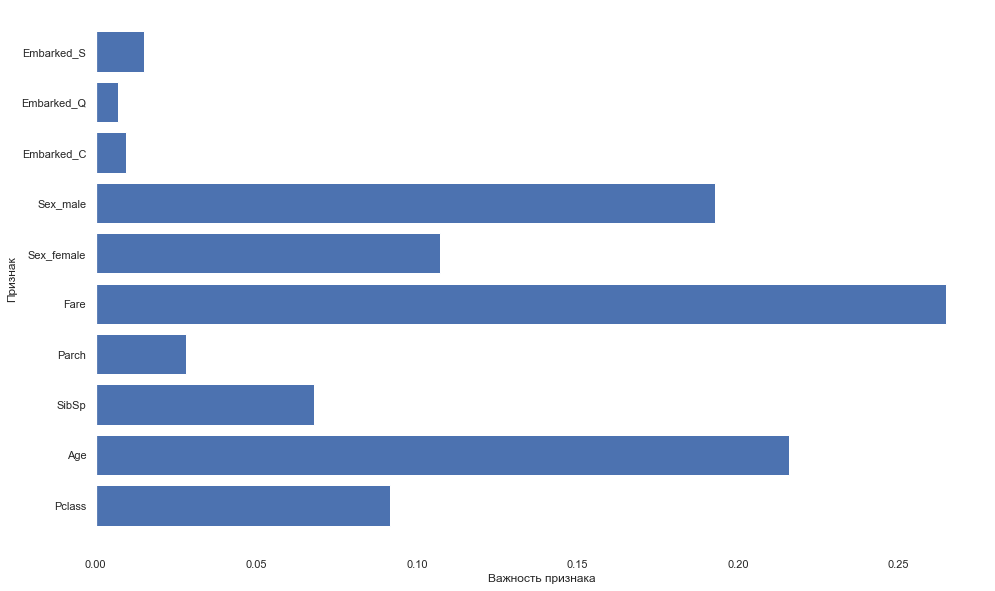

In [174]:
plot_feature_importances_cancer(gbrt)

In [175]:
X_test = pd.get_dummies(test_data[col3])
predictions = gbrt.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('GradientBoosting.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Ещё один довольно мощный метод линейной классификации, как и логистическая регрессия это метод опорных векторов

In [176]:
col5 = ['Pclass', 'Age','Sex', 'SibSp', 'Parch','Fare', 'Embarked']

In [177]:
#SVM
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

y = train_data["Survived"]
X = pd.get_dummies(train_data[col5])

scaler = MinMaxScaler(feature_range = (0, 1)) #Преобразуем к скалярному виду
scaler.fit(X)
X = scaler.transform(X)

X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.20)

svm = SVC(kernel='rbf', C=3, gamma=1)
svm.fit(X_train5, y_train5)

y_pred5 = svm.predict(X_test5)
scores = cross_val_score(svm, X, y, cv=5)
print(scores)

[0.81564246 0.83146067 0.84831461 0.79213483 0.83707865]


In [178]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test5, y_pred5))
print(classification_report(y_test5, y_pred5))

[[99  7]
 [27 46]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       106
           1       0.87      0.63      0.73        73

    accuracy                           0.81       179
   macro avg       0.83      0.78      0.79       179
weighted avg       0.82      0.81      0.80       179



In [179]:
X_test = pd.get_dummies(test_data[col5])
predictions = svm.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('SVM.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
